# Happy Customers

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/ACME-HappinessSurvey2020.csv')
df

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5
...,...,...,...,...,...,...,...
121,1,5,2,3,4,4,3
122,1,5,2,3,4,2,5
123,1,5,3,3,4,4,5
124,0,4,3,3,4,4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [5]:
df.nunique()

Y     2
X1    4
X2    5
X3    5
X4    5
X5    5
X6    5
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Y,126.0,0.547619,0.499714,0.0,0.0,1.0,1.0,1.0
X1,126.0,4.333333,0.800000,1.0,4.0,5.0,5.0,5.0
X2,126.0,2.531746,1.114892,1.0,2.0,3.0,3.0,5.0
X3,126.0,3.309524,1.023440,1.0,3.0,3.0,4.0,5.0
X4,126.0,3.746032,0.875776,1.0,3.0,4.0,4.0,5.0
X5,126.0,3.650794,1.147641,1.0,3.0,4.0,4.0,5.0
X6,126.0,4.253968,0.809311,1.0,4.0,4.0,5.0,5.0


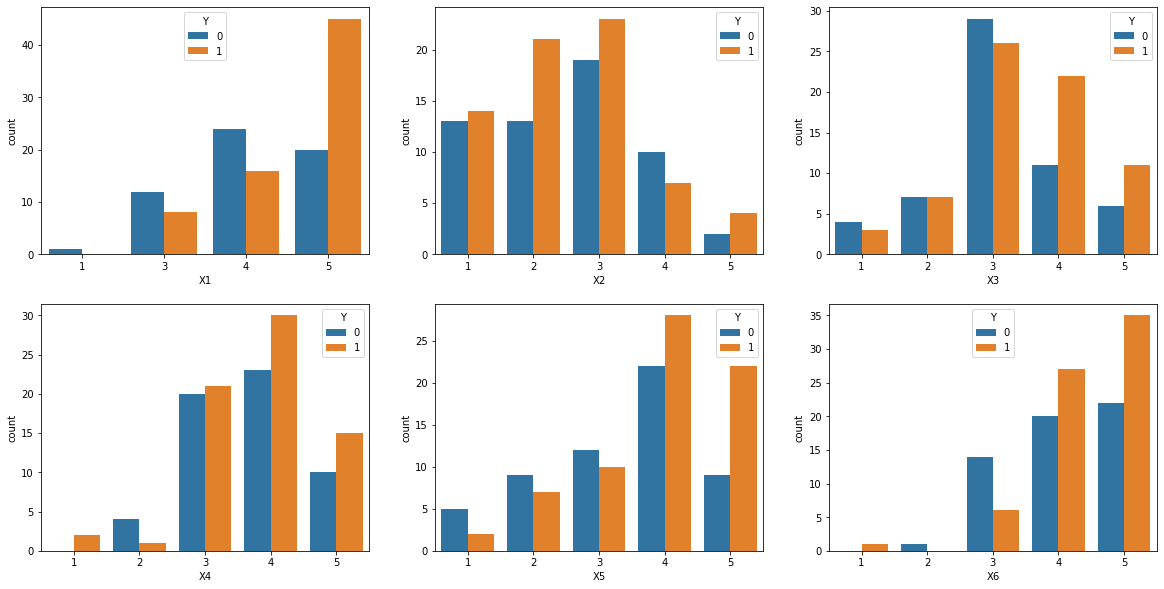

In [7]:
n = 1
plt.figure(figsize=(20,10))
for i in df.iloc[:,1:]:
  plt.subplot(2,3,n)
  sns.countplot(data = df, x = i, hue = 'Y');
  n+=1

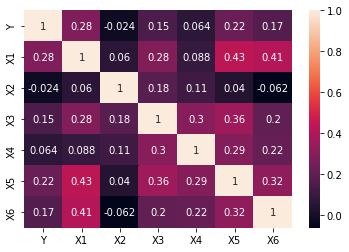

In [8]:
sns.heatmap(df.corr(), annot=True);

## Modelleme Aşaması

In [9]:
X = df.drop('Y', axis=1)
y = df.Y

In [10]:
X_d = pd.get_dummies(X, columns = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6'])

In [11]:
!pip install catboost

     |████████████████████████████████| 76.3 MB 17 kB/s 


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [13]:
models = [LogisticRegression,
          KNeighborsClassifier,
          SVC,
          MLPClassifier,
          DecisionTreeClassifier,
          RandomForestClassifier,
          GradientBoostingClassifier,
          XGBClassifier,
          LGBMClassifier,
          CatBoostClassifier]

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X_d,y, test_size = 0.15, random_state = 101)

In [17]:
accuracy = []
model_name = []
for i in models:
  model = i().fit(X_train,y_train)
  y_pred = model.predict(X_test)
  accuracy.append(accuracy_score(y_test, y_pred)*100)
  model_name.append(i.__name__)
Scores = pd.DataFrame({'Model_name':model_name, 'Accuracy_score':accuracy})
Scores

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Learning rate set to 0.003967
0:	learn: 0.6914055	total: 469us	remaining: 469ms
1:	learn: 0.6909935	total: 798us	remaining: 398ms
2:	learn: 0.6898129	total: 1.48ms	remaining: 491ms
3:	learn: 0.6885035	total: 2.12ms	remaining: 528ms
4:	learn: 0.6872404	total: 3.04ms	remaining: 606ms
5:	learn: 0.6862347	total: 3.63ms	remaining: 601ms
6:	learn: 0.6858973	total: 4.15ms	remaining: 588ms
7:	learn: 0.6846469	total: 4.89ms	remaining: 606ms
8:	learn: 0.6832898	total: 5.51ms	remaining: 607ms
9:	learn: 0.6825454	total: 6.1ms	remaining: 604ms
10:	learn: 0.6813106	total: 6.64ms	remaining: 597ms
11:	learn: 0.6805704	total: 7.23ms	remaining: 595ms
12:	learn: 0.6796274	total: 7.83ms	remaining: 595ms
13:	learn: 0.6787549	total: 8.42ms	remaining: 593ms
14:	learn: 0.6774390	total: 9.01ms	remaining: 592ms
15:	learn: 0.6761231	total: 9.63ms	remaining: 592ms
16:	learn: 0.6749655	total: 10.2ms	remaining: 590ms
17:	learn: 0.6743876	total: 10.8ms	remaining: 591ms
18:	learn: 0.6736047	total: 11.4ms	remaining: 5

,Model_name,Accuracy_score
0,LogisticRegression,63.157895
1,KNeighborsClassifier,73.684211
2,SVC,78.947368
3,MLPClassifier,68.421053
4,DecisionTreeClassifier,52.631579
5,RandomForestClassifier,78.947368
6,GradientBoostingClassifier,57.894737
7,XGBClassifier,52.631579
8,LGBMClassifier,63.157895
9,CatBoostClassifier,78.947368


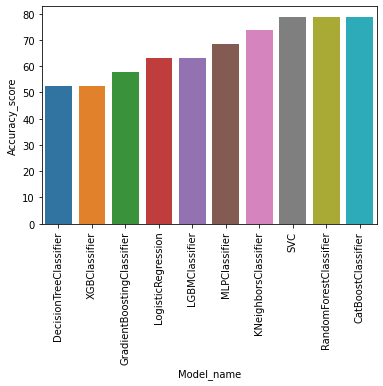

In [18]:
sns.barplot(data = Scores.sort_values('Accuracy_score'), x = 'Model_name', y = 'Accuracy_score');
plt.xticks(rotation = 90);

## Standardizasyon

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
ss = StandardScaler()
X_n = pd.DataFrame(ss.fit_transform(X_d), columns = X_d.columns)

In [21]:
X_n

,X1_1,X1_3,X1_4,X1_5,X2_1,X2_2,X2_3,X2_4,X2_5,X3_1,X3_2,X3_3,X3_4,X3_5,X4_1,X4_2,X4_3,X4_4,X4_5,X5_1,X5_2,X5_3,X5_4,X5_5,X6_1,X6_2,X6_3,X6_4,X6_5
0,-0.089443,2.302173,-0.681994,-1.032266,-0.522233,-0.607919,1.414214,-0.394922,-0.223607,-0.242536,-0.353553,1.136182,-0.595683,-0.394922,-0.127,-0.203279,-0.694516,1.173609,-0.497519,-0.242536,2.622022,-0.459933,-0.811107,-0.571241,-0.089443,-0.089443,-0.434372,1.296476,-0.908893
1,-0.089443,2.302173,-0.681994,-1.032266,-0.522233,1.644957,-0.707107,-0.394922,-0.223607,-0.242536,-0.353553,1.136182,-0.595683,-0.394922,-0.127,-0.203279,-0.694516,-0.852072,2.009975,-0.242536,-0.381385,-0.459933,1.232883,-0.571241,-0.089443,-0.089443,2.302173,-0.771321,-0.908893
2,-0.089443,-0.434372,-0.681994,0.968742,-0.522233,-0.607919,1.414214,-0.394922,-0.223607,-0.242536,-0.353553,1.136182,-0.595683,-0.394922,-0.127,-0.203279,1.439851,-0.852072,-0.497519,-0.242536,-0.381385,2.174229,-0.811107,-0.571241,-0.089443,-0.089443,-0.434372,-0.771321,1.100239
3,-0.089443,-0.434372,-0.681994,0.968742,-0.522233,-0.607919,-0.707107,2.532146,-0.223607,-0.242536,-0.353553,1.136182,-0.595683,-0.394922,-0.127,-0.203279,1.439851,-0.852072,-0.497519,-0.242536,-0.381385,2.174229,-0.811107,-0.571241,-0.089443,-0.089443,-0.434372,-0.771321,1.100239
4,-0.089443,-0.434372,-0.681994,0.968742,-0.522233,-0.607919,-0.707107,2.532146,-0.223607,-0.242536,-0.353553,1.136182,-0.595683,-0.394922,-0.127,-0.203279,1.439851,-0.852072,-0.497519,-0.242536,-0.381385,2.174229,-0.811107,-0.571241,-0.089443,-0.089443,-0.434372,-0.771321,1.100239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,-0.089443,-0.434372,-0.681994,0.968742,-0.522233,1.644957,-0.707107,-0.394922,-0.223607,-0.242536,-0.353553,1.136182,-0.595683,-0.394922,-0.127,-0.203279,-0.694516,1.173609,-0.497519,-0.242536,-0.381385,-0.459933,1.232883,-0.571241,-0.089443,-0.089443,2.302173,-0.771321,-0.908893
122,-0.089443,-0.434372,-0.681994,0.968742,-0.522233,1.644957,-0.707107,-0.394922,-0.223607,-0.242536,-0.353553,1.136182,-0.595683,-0.394922,-0.127,-0.203279,-0.694516,1.173609,-0.497519,-0.242536,2.622022,-0.459933,-0.811107,-0.571241,-0.089443,-0.089443,-0.434372,-0.771321,1.100239
123,-0.089443,-0.434372,-0.681994,0.968742,-0.522233,-0.607919,1.414214,-0.394922,-0.223607,-0.242536,-0.353553,1.136182,-0.595683,-0.394922,-0.127,-0.203279,-0.694516,1.173609,-0.497519,-0.242536,-0.381385,-0.459933,1.232883,-0.571241,-0.089443,-0.089443,-0.434372,-0.771321,1.100239
124,-0.089443,-0.434372,1.466288,-1.032266,-0.522233,-0.607919,1.414214,-0.394922,-0.223607,-0.242536,-0.353553,1.136182,-0.595683,-0.394922,-0.127,-0.203279,-0.694516,1.173609,-0.497519,-0.242536,-0.381385,-0.459933,1.232883,-0.571241,-0.089443,-0.089443,-0.434372,-0.771321,1.100239


In [22]:
X_train,X_test,y_train,y_test = train_test_split(X_n,y, test_size = 0.15, random_state = 101)

In [23]:
accuracy = []
model_name = []
for i in models:
  model = i().fit(X_train,y_train)
  y_pred = model.predict(X_test)
  accuracy.append(accuracy_score(y_test, y_pred)*100)
  model_name.append(i.__name__)
Scores = pd.DataFrame({'Model_name':model_name, 'Accuracy_score':accuracy})
Scores

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Learning rate set to 0.003967
0:	learn: 0.6914055	total: 480us	remaining: 480ms
1:	learn: 0.6909935	total: 1.06ms	remaining: 531ms
2:	learn: 0.6898129	total: 1.69ms	remaining: 561ms
3:	learn: 0.6885035	total: 2.32ms	remaining: 577ms
4:	learn: 0.6872404	total: 2.92ms	remaining: 582ms
5:	learn: 0.6862347	total: 3.52ms	remaining: 583ms
6:	learn: 0.6858973	total: 4.15ms	remaining: 589ms
7:	learn: 0.6846469	total: 4.72ms	remaining: 585ms
8:	learn: 0.6832898	total: 5.31ms	remaining: 585ms
9:	learn: 0.6825454	total: 5.89ms	remaining: 583ms
10:	learn: 0.6813106	total: 6.44ms	remaining: 579ms
11:	learn: 0.6805704	total: 7.02ms	remaining: 578ms
12:	learn: 0.6796274	total: 7.61ms	remaining: 578ms
13:	learn: 0.6787549	total: 8.21ms	remaining: 578ms
14:	learn: 0.6774390	total: 8.81ms	remaining: 579ms
15:	learn: 0.6761231	total: 9.4ms	remaining: 578ms
16:	learn: 0.6749655	total: 9.97ms	remaining: 576ms
17:	learn: 0.6743876	total: 10.6ms	remaining: 577ms
18:	learn: 0.6736047	total: 11.2ms	remaining: 

,Model_name,Accuracy_score
0,LogisticRegression,68.421053
1,KNeighborsClassifier,63.157895
2,SVC,84.210526
3,MLPClassifier,68.421053
4,DecisionTreeClassifier,57.894737
5,RandomForestClassifier,84.210526
6,GradientBoostingClassifier,57.894737
7,XGBClassifier,52.631579
8,LGBMClassifier,63.157895
9,CatBoostClassifier,78.947368


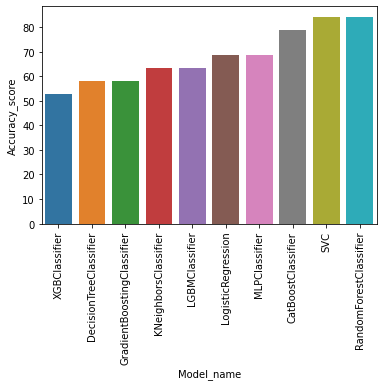

In [24]:
sns.barplot(data = Scores.sort_values('Accuracy_score'), x = 'Model_name', y = 'Accuracy_score');
plt.xticks(rotation = 90);

#### Modellerden elde edilen maksimum skor %84'tür